<a href="https://colab.research.google.com/github/TanizzCoder/Minor-Project/blob/main/Diabetes_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd
# Importing the datasets
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x = df.iloc[:, :8]
y = df['Outcome']



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn import metrics
model = Sequential()

model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs = 2500, batch_size=15, validation_data=(x_test, y_test))

Streaming output truncated to the last 5000 lines.
Epoch 1/2500
41/41 [==============================] - 2s 17ms/step - loss: 0.2654 - accuracy: 0.4935 - val_loss: 0.2453 - val_accuracy: 0.5779
Epoch 2/2500
41/41 [==============================] - 0s 6ms/step - loss: 0.2410 - accuracy: 0.5961 - val_loss: 0.2271 - val_accuracy: 0.6883
Epoch 3/2500
41/41 [==============================] - 0s 5ms/step - loss: 0.2285 - accuracy: 0.6238 - val_loss: 0.2137 - val_accuracy: 0.7143
Epoch 4/2500
41/41 [==============================] - 0s 6ms/step - loss: 0.2172 - accuracy: 0.6775 - val_loss: 0.2027 - val_accuracy: 0.7338
Epoch 5/2500
41/41 [==============================] - 0s 7ms/step - loss: 0.2106 - accuracy: 0.6857 - val_loss: 0.1930 - val_accuracy: 0.7208
Epoch 6/2500
41/41 [==============================] - 0s 9ms/step - loss: 0.2004 - accuracy: 0.6971 - val_loss: 0.1851 - val_accuracy: 0.7468
Epoch 7/2500
41/41 [==============================] - 0s 7ms/step - loss: 0.1994 - accuracy: 0.7

In [ ]:
model.save('model1')

In [ ]:
from keras.models import load_model
ann=load_model('model1')
ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12)                108       
                                                                 
 dense_5 (Dense)             (None, 8)                 104       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


5/5 [==============================] - 0s 4ms/step
Accuracy: 0.7272727272727273
Precision:  0.5675675675675675
Recall:  0.44680851063829785
f1:  0.5
		Confusion Matrix


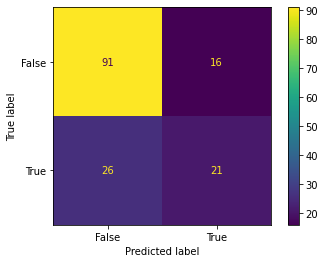

In [ ]:
y_pred = ann.predict(x_test)
y_pred =(y_pred>0.75)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision: ",precision)
print("Recall: ",recall)
print("f1: ",f1)
print("\t\tConfusion Matrix")
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()